In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
df= pd.read_csv('device_failure.csv')

In [3]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,1/1/2015,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [4]:
df.tail()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
124489,11/2/2015,Z1F0MA1S,0,18310224,0,0,0,10,353705,8,8,0
124490,11/2/2015,Z1F0Q8RT,0,172556680,96,107,4,11,332792,0,0,13
124491,11/2/2015,Z1F0QK05,0,19029120,4832,0,0,11,350410,0,0,0
124492,11/2/2015,Z1F0QL3N,0,226953408,0,0,0,12,358980,0,0,0
124493,11/2/2015,Z1F0QLC1,0,17572840,0,0,0,10,351431,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [6]:
print(df['date'].max())
print(df['date'].min())

# Min max date is done to check what date-range of data is provided.

9/9/2015
1/1/2015


In [7]:
# columns attribute7	attribute8 are having same values 
print(df[['attribute7','attribute8']])

        attribute7  attribute8
0                0           0
1                0           0
2                0           0
3                0           0
4                0           0
...            ...         ...
124489           8           8
124490           0           0
124491           0           0
124492           0           0
124493           0           0

[124494 rows x 2 columns]


In [8]:
# dropping one of the columns.
df= df.copy().drop(columns=['attribute8'])

In [9]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
0,1/1/2015,S1F01085,0,215630672,56,0,52,6,407438,0,7
1,1/1/2015,S1F0166B,0,61370680,0,3,0,6,403174,0,0
2,1/1/2015,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0
3,1/1/2015,S1F01JE0,0,79694024,0,0,0,6,410186,0,0
4,1/1/2015,S1F01R2B,0,135970480,0,0,0,15,313173,0,3


In [10]:
# checking for duplicate row
duplicate_rows_df=df[df.duplicated()]

In [11]:
duplicate_rows_df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9


In [12]:
# Counting the days since device is installed.
# useing the Date column to get the day
df.sort_values(['device','date'],inplace=True)
df['date']= pd.to_datetime(df['date'])
df['Days']= df.groupby('device')['date'].rank(method='dense')

In [13]:
df.head(10)

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,Days
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,7,1.0
1163,2015-01-02,S1F01085,0,1650864,56,0,52,6,407438,0,7,2.0
2326,2015-01-03,S1F01085,0,124017368,56,0,52,6,407438,0,7,3.0
3489,2015-01-04,S1F01085,0,128073224,56,0,52,6,407439,0,7,4.0
4651,2015-01-05,S1F01085,0,97393448,56,0,52,6,408114,0,7,5.0
5812,2015-01-06,S1F01085,0,128832128,56,0,52,6,409404,0,7,6.0
79790,2015-05-10,S1F013BB,0,85127128,0,0,0,5,689062,0,0,5.0
80194,2015-05-11,S1F013BB,0,115676688,0,0,0,5,689161,0,0,6.0
78172,2015-05-06,S1F013BB,0,14533968,0,0,0,5,688952,0,0,1.0
78576,2015-05-07,S1F013BB,0,46202296,0,0,0,5,688952,0,0,2.0


In [14]:
# checking for duplicate row
duplicate_rows_df=df[df.duplicated()]

In [15]:
duplicate_rows_df

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,Days


In [16]:
print(df['Days'].max())
print(df['Days'].min())

304.0
1.0


In [17]:
df[df['Days']==304]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,Days
124463,2015-11-02,S1F0E9EP,0,205465736,0,0,12,11,353337,0,0,304.0
124464,2015-11-02,S1F0EGMT,0,159867281,0,0,13,11,347165,32,0,304.0
124465,2015-11-02,S1F0FGBQ,0,198816136,0,0,0,12,309988,0,0,304.0
124466,2015-11-02,S1F0FP0C,0,179176160,0,0,0,12,356892,0,0,304.0
124467,2015-11-02,S1F0GCED,0,94904784,64792,0,7,11,341541,0,0,304.0
124468,2015-11-02,S1F0GGPP,0,183027976,0,2112,0,12,362350,0,0,304.0
124469,2015-11-02,S1F0GPXY,0,100353624,0,0,0,11,352831,0,10,304.0
124470,2015-11-02,S1F0H6JG,0,159855344,0,0,0,10,345928,0,0,304.0
124471,2015-11-02,S1F0KYCR,0,123741008,0,0,0,12,354413,0,0,304.0
124475,2015-11-02,W1F05X69,0,201954496,0,0,2,5,351522,0,4,304.0


In [18]:
df[df['Days']==1]

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,Days
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,7,1.0
78172,2015-05-06,S1F013BB,0,14533968,0,0,0,5,688952,0,0,1.0
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,1.0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,1.0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2015-01-01,Z1F1VMZB,0,45340272,0,0,0,5,186491,0,0,1.0
1159,2015-01-01,Z1F1VQFY,0,16736808,0,0,0,6,224020,0,0,1.0
1160,2015-01-01,Z1F26YZB,0,193902776,0,1,0,1,271646,0,0,1.0
1161,2015-01-01,Z1F282ZV,0,161799176,0,1,0,1,171608,0,0,1.0


In [20]:
df['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [21]:
df = df.drop(columns=['date','device','Days'])

In [22]:
df.head()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
0,0,215630672,56,0,52,6,407438,0,7
1163,0,1650864,56,0,52,6,407438,0,7
2326,0,124017368,56,0,52,6,407438,0,7
3489,0,128073224,56,0,52,6,407439,0,7
4651,0,97393448,56,0,52,6,408114,0,7


In [23]:
# No Need for Handling missing vavlue as none present

In [24]:
df.isnull().sum()

failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute9    0
dtype: int64

### Outlier Analysis of Numerical Features

In [25]:
df_num = df.drop(columns='failure') 

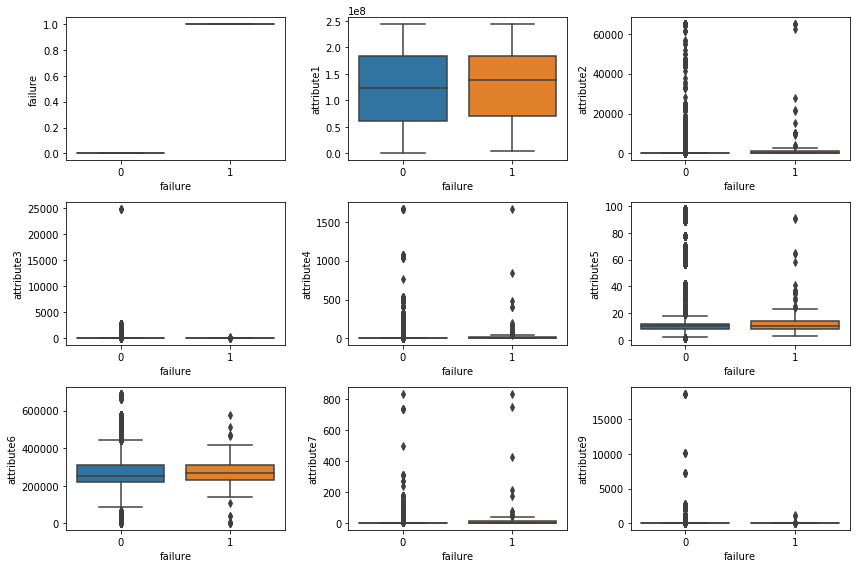

In [27]:
# Bivariate Visulizing of Data by plottting box plot
fig,axes=plt.subplots(3,3,figsize=(12,8))
axes= axes.flatten()
for i in range(0,len(df.columns)):
    sns.boxplot(x='failure',y=df.iloc[:,i],data=df, orient='v', ax=axes[i])

plt.tight_layout()
plt.show()

In [28]:
df_num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
count,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,12.451524
std,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,191.425623
min,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000
1%,2.401025e+06,0.000000,0.000000,0.000000,4.000000,26.000000,0.000000,0.000000
5%,1.209010e+07,0.000000,0.000000,0.000000,6.000000,46.000000,0.000000,0.000000
10%,2.428512e+07,0.000000,0.000000,0.000000,6.000000,192870.000000,0.000000,0.000000
25%,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000
50%,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000
75%,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000


### Capping and Flooring of outliers

In [29]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [30]:
df_num =df_num.apply(lambda x : outlier_cap(x))

In [35]:
df_num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,failure
count,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,1.223872e+08,55.455331,2.029367,0.662899,14.206082,259937.338491,0.093482,3.592326,0.000851
std,7.041901e+07,339.633205,12.840659,3.134373,15.779405,98503.721053,0.858995,18.699464,0.029167
min,2.401025e+06,0.000000,0.000000,0.000000,4.000000,26.000000,0.000000,0.000000,0.000000
1%,2.401084e+06,0.000000,0.000000,0.000000,4.000000,26.000000,0.000000,0.000000,0.000000
5%,1.209010e+07,0.000000,0.000000,0.000000,6.000000,46.000000,0.000000,0.000000,0.000000
10%,2.428512e+07,0.000000,0.000000,0.000000,6.000000,192870.000000,0.000000,0.000000,0.000000
25%,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000


In [36]:
df_num['failure']= df['failure']

In [38]:
df_num.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,failure
0,2.156307e+08,56,0,25,6,407438.0,0,7,0
1163,2.401025e+06,56,0,25,6,407438.0,0,7,0
2326,1.240174e+08,56,0,25,6,407438.0,0,7,0
3489,1.280732e+08,56,0,25,6,407439.0,0,7,0
4651,9.739345e+07,56,0,25,6,408114.0,0,7,0


In [41]:
corr= df_num.corrwith(df_num.failure)
corr

attribute1    0.001979
attribute2    0.055556
attribute3   -0.000260
attribute4    0.074836
attribute5    0.002341
attribute6   -0.000728
attribute7    0.096851
attribute9    0.001932
failure       1.000000
dtype: float64

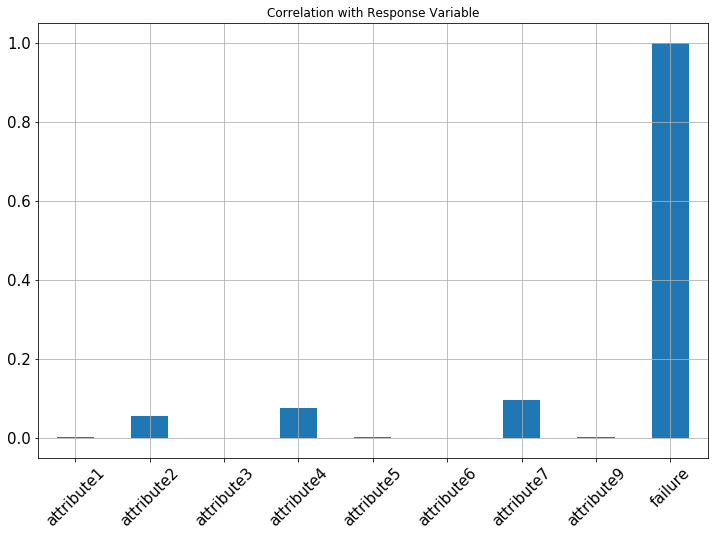

In [42]:
# plotting it for better understanding
corr.plot.bar(figsize=(12,8),title='Correlation with Response Variable',fontsize=15,rot=45,grid=True)

In [46]:
# Multicollinearity
corr2 = df_num.corr()
corr2

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9,failure
attribute1,1.000000,0.000335,0.002960,0.005254,-0.003370,-0.001513,-0.002588,-0.003037,0.001979
attribute2,0.000335,1.000000,-0.019103,0.161939,-0.039222,-0.031748,0.099300,-0.021382,0.055556
attribute3,0.002960,-0.019103,1.000000,0.024026,0.043743,0.013723,-0.016256,0.492538,-0.000260
attribute4,0.005254,0.161939,0.024026,1.000000,0.028246,0.029481,0.200948,0.008439,0.074836
attribute5,-0.003370,-0.039222,0.043743,0.028246,1.000000,-0.016803,-0.020640,0.172834,0.002341
attribute6,-0.001513,-0.031748,0.013723,0.029481,-0.016803,1.000000,-0.011952,0.048332,-0.000728
attribute7,-0.002588,0.099300,-0.016256,0.200948,-0.020640,-0.011952,1.000000,-0.008003,0.096851
attribute9,-0.003037,-0.021382,0.492538,0.008439,0.172834,0.048332,-0.008003,1.000000,0.001932
failure,0.001979,0.055556,-0.000260,0.074836,0.002341,-0.000728,0.096851,0.001932,1.000000


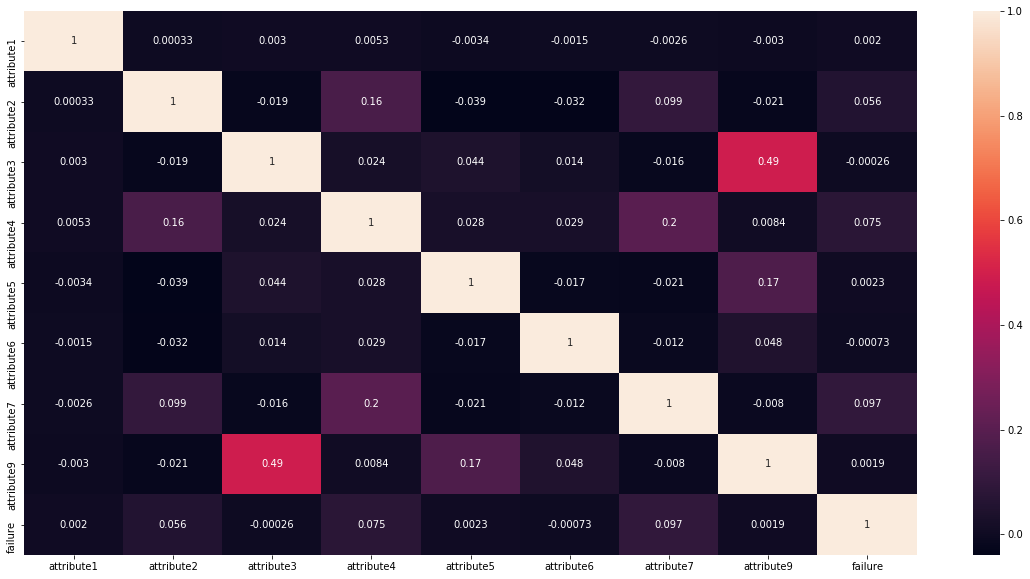

In [47]:
# Plotting a heatmap to check Multicollinearity

plt.figure(figsize=(20,10))
sns.heatmap(corr2,annot=True);

In [48]:
# According to the barplot of correlation dropping the Non related IV with the DV
df1= df_num.copy().drop(columns=['attribute1','attribute3','attribute5','attribute6','attribute9'])

In [49]:
df1.head()

,attribute2,attribute4,attribute7,failure
0,56,25,0,0
1163,56,25,0,0
2326,56,25,0,0
3489,56,25,0,0
4651,56,25,0,0


In [50]:
df1['failure'].value_counts()

0    124388
1       106
Name: failure, dtype: int64

In [51]:
# Highly imbalanced dataset. Thus we need to balance this dataset.
# While solving the problem without balancing the dataset the Classification Evaluation Metrics got was very poor.

## Balanicing the Dataset.

In [52]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df1[df1.failure==0]
df_minority =  df1[df1.failure==1]

print(df_majority.failure.count())
print("-----------")
print(df_minority.failure.count())
print("-----------")
print(df1.failure.value_counts())

124388
-----------
106
-----------
0    124388
1       106
Name: failure, dtype: int64


In [53]:
# UPSAMPLING
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=124388,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.failure.value_counts()

1    124388
0    124388
Name: failure, dtype: int64

In [54]:
df_upsampled.head()

,attribute2,attribute4,attribute7,failure
0,56,25,0,0
1163,56,25,0,0
2326,56,25,0,0
3489,56,25,0,0
4651,56,25,0,0


In [55]:
# Splitting the data
x= df_upsampled.drop(columns='failure')
y = df_upsampled['failure']

In [56]:
# Splitting the Data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [57]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [58]:
# scale the x_train and create a new variable for scaled x_train
#Standard scaler returns a numpy array so we need to convert to DataFrame
#In array form 'index' and 'column names' are lost we need it so convert to Df

x_train_scaled= pd.DataFrame(sc.fit_transform(x_train))
x_test_scaled = pd.DataFrame(sc.transform(x_test))

In [59]:
# put x_train_scaled have the columns of original x_train set
x_train_scaled.columns = x_train.columns.values

# put x_test_scaled have the columns of original x_test set
x_test_scaled.columns = x_test.columns.values

# take the indexes also
x_train_scaled.index = x_train.index.values
x_test_scaled.index = x_test.index.values

In [62]:
x_train= x_train_scaled
x_test = x_test_scaled

In [63]:
x_train.head()

,attribute2,attribute4,attribute7
47010,-0.431398,-0.543178,-0.482981
10980,-0.450495,-0.543178,-0.482981
12668,-0.450495,-0.543178,-0.482981
72612,-0.450495,-0.543178,-0.482981
16475,-0.450495,0.152529,2.070642


#  Applying machine learning algorithms

In [64]:
# Applying machine learning algorithms
# Creating a function that will give the Following output when any model is run

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [65]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(random_state=0)

clf_lr.fit(x_train ,y_train)
print_score(clf_lr, x_train,x_test,y_train,y_test, train=True)
print_score(clf_lr, x_train,x_test,y_train,y_test, train=False)

Train Result:
Accuracy Score: 81.99%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.753631      0.932913  0.819857       0.843272       0.843268
recall         0.950440      0.689262  0.819857       0.819851       0.819857
f1-score       0.840671      0.792789  0.819857       0.816730       0.816731
support    99515.000000  99505.000000  0.819857  199020.000000  199020.000000
_______________________________________________
Confusion Matrix: 
 [[94583  4932]
 [30920 68585]]

Test Result:
Accuracy Score: 81.89%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.753224      0.930610  0.818936      0.841917      0.841935
recall         0.948579      0.689346  0.818936      0.818962      0.818936
f1-score       0.839689      0.792012  0.818936      0.815850      

In [67]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier
clf_tree= DecisionTreeClassifier(random_state=0)

clf_tree.fit(x_train ,y_train)
print_score(clf_tree,x_train,x_test,y_train,y_test, train=True)
print_score(clf_tree,x_train,x_test,y_train,y_test, train=False)

Train Result:
Accuracy Score: 87.81%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.822839      0.956236  0.878113       0.889537       0.889534
recall         0.963734      0.792483  0.878113       0.878108       0.878113
f1-score       0.887731      0.866692  0.878113       0.877212       0.877212
support    99515.000000  99505.000000  0.878113  199020.000000  199020.000000
_______________________________________________
Confusion Matrix: 
 [[95906  3609]
 [20649 78856]]

Test Result:
Accuracy Score: 87.78%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.822522      0.955965  0.877824      0.889244      0.889257
recall         0.963495      0.792187  0.877824      0.877841      0.877824
f1-score       0.887445      0.866404  0.877824      0.876925      

In [68]:
# Random Forest
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf= RandomForestClassifier(random_state=0)

clf_rf.fit(x_train,y_train)
print_score(clf_rf,x_train,x_test,y_train,y_test,train=True)
print_score(clf_rf,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score: 87.81%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      0.822839      0.956236  0.878113       0.889537       0.889534
recall         0.963734      0.792483  0.878113       0.878108       0.878113
f1-score       0.887731      0.866692  0.878113       0.877212       0.877212
support    99515.000000  99505.000000  0.878113  199020.000000  199020.000000
_______________________________________________
Confusion Matrix: 
 [[95906  3609]
 [20649 78856]]

Test Result:
Accuracy Score: 87.78%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.822522      0.955965  0.877824      0.889244      0.889257
recall         0.963495      0.792187  0.877824      0.877841      0.877824
f1-score       0.887445      0.866404  0.877824      0.876925      

# Performing Hyper Parameter tuning for DT for UP Sampled Data

In [70]:
# Entire Dataset
df.head()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
0,0,215630672,56,0,52,6,407438,0,7
1163,0,1650864,56,0,52,6,407438,0,7
2326,0,124017368,56,0,52,6,407438,0,7
3489,0,128073224,56,0,52,6,407439,0,7
4651,0,97393448,56,0,52,6,408114,0,7


In [71]:
# Balancing the dataset
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.failure==0]
df_minority =  df[df.failure==1]

print(df_majority.failure.count())
print("-----------")
print(df_minority.failure.count())
print("-----------")
print(df.failure.value_counts())

124388
-----------
106
-----------
0    124388
1       106
Name: failure, dtype: int64


In [72]:
# UPSAMPLING
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=124388,    # to match majority class
                                 random_state=587) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.failure.value_counts()

1    124388
0    124388
Name: failure, dtype: int64

In [73]:
# Splitting the data
x= df_upsampled.drop(columns='failure')
y = df_upsampled['failure']

In [74]:
# Splitting the Data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [75]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [76]:
# scale the x_train and create a new variable for scaled x_train
#Standard scaler returns a numpy array so we need to convert to DataFrame
#In array form 'index' and 'column names' are lost we need it so convert to Df

x_train_scaled= pd.DataFrame(sc.fit_transform(x_train))
x_test_scaled = pd.DataFrame(sc.transform(x_test))

# put x_train_scaled have the columns of original x_train set
x_train_scaled.columns = x_train.columns.values

# put x_test_scaled have the columns of original x_test set
x_test_scaled.columns = x_test.columns.values

# take the indexes also
x_train_scaled.index = x_train.index.values
x_test_scaled.index = x_test.index.values

x_train= x_train_scaled
x_test = x_test_scaled

In [77]:
x_train.head()

,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute9
47010,0.333317,-0.227056,-0.053421,-0.202379,0.518735,-2.564980,-0.183638,-0.105864
10980,0.799690,-0.228756,-0.053421,-0.202379,-0.371764,1.581612,-0.183638,-0.105864
12668,1.373180,-0.228756,-0.053421,-0.202379,-0.053728,0.654247,-0.183638,-0.105864
72612,0.586835,-0.228756,-0.045846,-0.202379,-0.180943,2.209999,-0.183638,-0.088083
16475,0.555132,-0.228756,-0.053421,-0.159774,-0.498978,-0.195697,0.100275,-0.105864


In [78]:
y_train.head()

47010    1
10980    0
12668    1
72612    0
16475    1
Name: failure, dtype: int64

In [79]:
# Random Forest
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=0)

rf.fit(x_train,y_train)
print_score(rf,x_train,x_test,y_train,y_test,train=True)
print_score(rf,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      1.000000      0.999990  0.999995       0.999995       0.999995
recall         0.999990      1.000000  0.999995       0.999995       0.999995
f1-score       0.999995      0.999995  0.999995       0.999995       0.999995
support    99515.000000  99505.000000  0.999995  199020.000000  199020.000000
_______________________________________________
Confusion Matrix: 
 [[99514     1]
 [    0 99505]]

Test Result:
Accuracy Score: 99.98%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      1.000000      0.999679  0.999839      0.999839      0.999839
recall         0.999678      1.000000  0.999839      0.999839      0.999839
f1-score       0.999839      0.999839  0.999839      0.999839     

In [81]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=x_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
attribute4,0.215858
attribute6,0.186771
attribute1,0.166052
attribute2,0.151019
attribute7,0.142306
attribute5,0.086082
attribute9,0.035732
attribute3,0.016180


### Considering only important feature now given by RF Feature Selection.

attribute4	0.215858<br>
attribute6	0.186771<br>
attribute1	0.166052<br>
attribute2	0.151019<br>
attribute7	0.142306<br>

In [82]:
df_upsampled.columns

Index(['failure', 'attribute1', 'attribute2', 'attribute3', 'attribute4',
       'attribute5', 'attribute6', 'attribute7', 'attribute9'],
      dtype='object')

In [84]:
# Splitting the data
x= df_upsampled.drop(columns=['failure','attribute3','attribute5','attribute9'])
y = df_upsampled['failure']

In [85]:
# Splitting the Data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

In [86]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [87]:
# scale the x_train and create a new variable for scaled x_train
#Standard scaler returns a numpy array so we need to convert to DataFrame
#In array form 'index' and 'column names' are lost we need it so convert to Df

x_train_scaled= pd.DataFrame(sc.fit_transform(x_train))
x_test_scaled = pd.DataFrame(sc.transform(x_test))

# put x_train_scaled have the columns of original x_train set
x_train_scaled.columns = x_train.columns.values

# put x_test_scaled have the columns of original x_test set
x_test_scaled.columns = x_test.columns.values

# take the indexes also
x_train_scaled.index = x_train.index.values
x_test_scaled.index = x_test.index.values

x_train= x_train_scaled
x_test = x_test_scaled

In [88]:
# Random Forest
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(random_state=0)

rf.fit(x_train,y_train)
print_score(rf,x_train,x_test,y_train,y_test,train=True)
print_score(rf,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy      macro avg   weighted avg
precision      1.000000      0.999990  0.999995       0.999995       0.999995
recall         0.999990      1.000000  0.999995       0.999995       0.999995
f1-score       0.999995      0.999995  0.999995       0.999995       0.999995
support    99515.000000  99505.000000  0.999995  199020.000000  199020.000000
_______________________________________________
Confusion Matrix: 
 [[99514     1]
 [    0 99505]]

Test Result:
Accuracy Score: 99.99%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      1.000000      0.999719  0.999859      0.999859      0.999859
recall         0.999719      1.000000  0.999859      0.999859      0.999859
f1-score       0.999859      0.999859  0.999859      0.999859     

# ROC And AUC

In [91]:
y_pred = rf.predict(x_test)

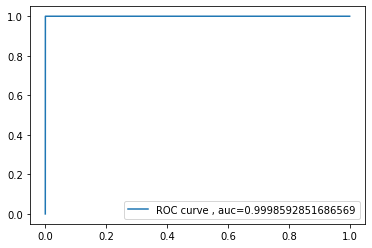

In [92]:
from sklearn import metrics
fpr, tpr, threshholds = metrics.roc_curve(y_test,y_pred)
auc = metrics.roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,label="ROC curve , auc="+str(auc))
plt.legend(loc=4)
plt.show()